# PyROOT Jupyter Notebook

**C++ Flavor**: Cells act identical to ROOT command line input.

ROOT version: 6.22/07

This notebook is to demonstrate some capabilities of a ROOT jupyter notebook. Notably it makes coding C++ ROOT snippets much easier to organize and manage, with each cell acting like a terminal with a ROOT prompt. 

Useful links:
[PyROOT documentation](https://root.cern/manual/python/)

The cells take in C++ commands

In [2]:
cout << "This is a C++ cell" << endl;
cout << "This is a the second line of a C++ cell" << endl;

This is a C++ cell
This is a the second line of a C++ cell


Let's list some ROOT macros and snippets I'd like to showcase:

- file io setup, ie load input files and creates files for readout.
- 



Create a new file to serve as the output file.

Creating a sample TH1F histogram and save it to a ROOT file

In [70]:
TFile f1("outputFile.root", "recreate");
TH1F h1("hgaus","histo from a gaussian",100,-3,3);
h1.FillRandom("gaus",10000);
h1.Write();
f1.Close();

Reading back the file contents

In [58]:
TFile f1("outputFile.root");
TH1F *h = (TH1F*)f1.Get("hgaus");





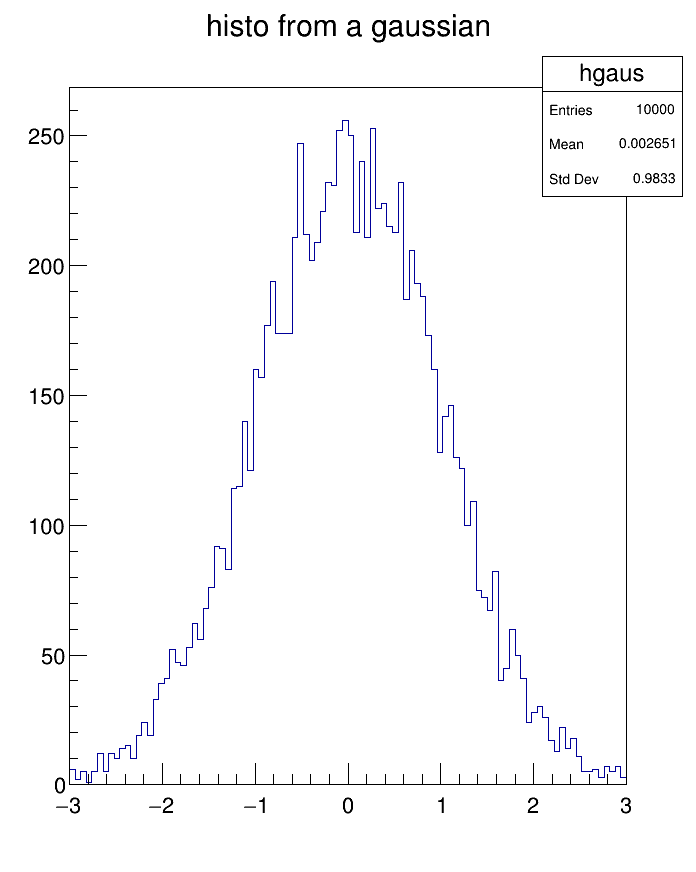

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [69]:

TCanvas *c1 = new TCanvas("c1","Histogram Canvas",200,10,700,900);
h->Draw();
c1->Draw();

In [65]:
TFile openfile("outputFile.root");

(TFile &) Name: outputFile.root Title: 


### Example - hstack
Some text

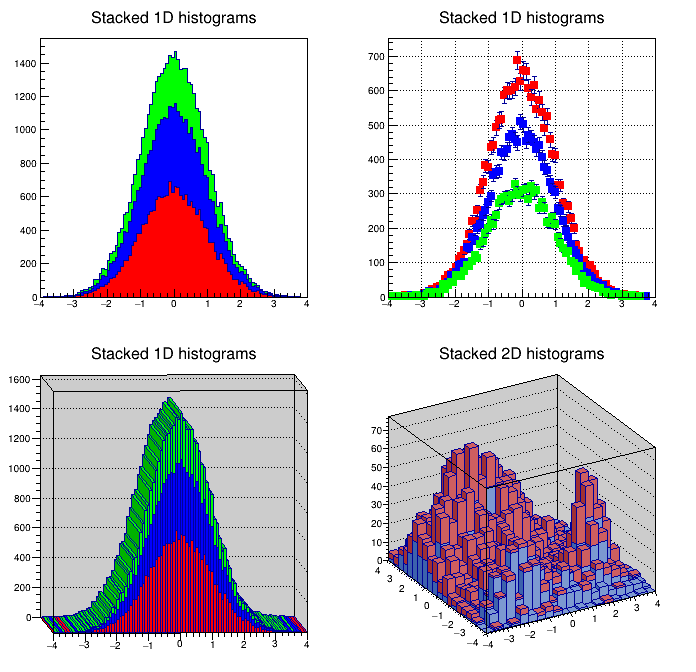

Warning in <TROOT::Append>: Replacing existing TH1: h1st (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2st (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3st (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cst
Warning in <TROOT::Append>: Replacing existing TH1: h2sta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2stb (Potential memory leak).


In [15]:
TCanvas *hstack() {
   THStack *hs = new THStack("hs","Stacked 1D histograms");
   //create three 1-d histograms
   TH1F *h1st = new TH1F("h1st","test hstack",100,-4,4);
   h1st->FillRandom("gaus",20000);
   h1st->SetFillColor(kRed);
   h1st->SetMarkerStyle(21);
   h1st->SetMarkerColor(kRed);
   hs->Add(h1st);
   TH1F *h2st = new TH1F("h2st","test hstack",100,-4,4);
   h2st->FillRandom("gaus",15000);
   h2st->SetFillColor(kBlue);
   h2st->SetMarkerStyle(21);
   h2st->SetMarkerColor(kBlue);
   hs->Add(h2st);
   TH1F *h3st = new TH1F("h3st","test hstack",100,-4,4);
   h3st->FillRandom("gaus",10000);
   h3st->SetFillColor(kGreen);
   h3st->SetMarkerStyle(21);
   h3st->SetMarkerColor(kGreen);
   hs->Add(h3st);
 
   TCanvas *cst = new TCanvas("cst","stacked hists",10,10,700,700);
   cst->Divide(2,2);
   // in top left pad, draw the stack with defaults
   cst->cd(1);
   hs->Draw();
   // in top right pad, draw the stack in non-stack mode
   // and errors option
   cst->cd(2);
   gPad->SetGrid();
   hs->Draw("nostack,e1p");
   //in bottom left, draw in stack mode with "lego1" option
   cst->cd(3);
   gPad->SetFrameFillColor(17);
   gPad->SetTheta(3.77);
   gPad->SetPhi(2.9);
   hs->Draw("lego1");
 
   cst->cd(4);
   //create two 2-D histograms and draw them in stack mode
   gPad->SetFrameFillColor(17);
   THStack *a = new THStack("a","Stacked 2D histograms");
   TF2 *f1 = new TF2("f1",
      "xygaus + xygaus(5) + xylandau(10)",-4,4,-4,4);
   Double_t params1[] = {130,-1.4,1.8,1.5,1, 150,2,0.5,-2,0.5,
      3600,-2,0.7,-3,0.3};
   f1->SetParameters(params1);
   TH2F *h2sta = new TH2F("h2sta","h2sta",20,-4,4,20,-4,4);
   h2sta->SetFillColor(38);
   h2sta->FillRandom("f1",4000);
   TF2 *f2 = new TF2("f2","xygaus + xygaus(5)",-4,4,-4,4);
   Double_t params2[] = {100,-1.4,1.9,1.1,2, 80,2,0.7,-2,0.5};
   f2->SetParameters(params2);
   TH2F *h2stb = new TH2F("h2stb","h2stb",20,-4,4,20,-4,4);
   h2stb->SetFillColor(46);
   h2stb->FillRandom("f2",3000);
   a->Add(h2sta);
   a->Add(h2stb);
   a->Draw();
   return cst;
}

hstack()->Draw()